In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<hr>
<h3>Exercicio 1</h3>
<p>Os dados a seguir representam o n´umero de ap´olices de seguro que um
corretor conseguiu vender em cada um de seus 20 primeiros dias em
um emprego novo: 2, 4, 6, 3, 2, 1, 4, 3, 5, 2, 1, 1, 4, 0, 2, 2, 5, 2,
2, 1. Analise a assimetria da distribui¸c˜ao, utilizando os coeficientes de
Pearson e de Bowley.</p>

In [9]:
data = [2, 4, 6, 3, 2, 1, 4, 3, 5, 2, 1, 1, 4, 0, 2, 2, 5, 2, 2, 1]
df = pd.DataFrame(data, columns=['apolices'])

def Person(media, moda, dp):
    return (media - moda) / dp

def Bowley(q1, md, q3):
    return ((q3-md) - (md-q1)) / (q3 - q1)

q1, md, q3 = df['apolices'].quantile([0.25, 0.50, 0.75])

print("Bowley: {:.2f}".format( Bowley(q1, md, q3) ))
print("Person: {:.2f}".format( Person(df['apolices'].mean(), df['apolices'].mode(), df['apolices'].std())[0] ))

Bowley: 0.78
Person: 0.37


<hr>
<h3>Exercicio 2</h3>
<p>O professor Celso tem duas op¸c˜oes de caminho para se dirigir da sua
casa at´e seu local de trabalho. Tentando definir qual o melhor caminho,
ele anota o tempo de viagem em diferentes dias, obtendo os seguintes
tempos (em minutos):</p>

<p style="padding-top: 20px"><b>Caminho 1:</b> 1 12 11 10 10 8 12 15 7 20 12</p>
<p style="padding-bottom: 20px"><b>Caminho 2:</b> 2 12 15 13 13 14 13 12 14 13 15</p>

<p>Fa¸ca uma an´alise comparativa desses dados para ajudar o professor
Celso a escolher um caminho.</p>

In [15]:
df = pd.DataFrame()
df['caminho1'] = [1, 12, 11, 10, 10, 8, 12, 15, 7, 20, 12]
df['caminho2'] = [2, 12, 15, 13, 13, 14, 13, 12, 14, 13, 15]

print ("Caminho1 é mais rapido" if df['caminho1'].mean() >  df['caminho2'].mean() else "Caminho2 é mais rápido")

Caminho2 é mais rápido


<h3>Exercicio 3</h3>
<p>Em sua pol´ıtica de fideliza¸c˜ao de clientes, determinado supermercado
tem uma promo¸c˜ao de dar descontos especiais diferenciados no mˆes do
anivers´ario do cliente. O desconto b´asico ´e de 5%, mas clientes especiais
– aqueles com pontua¸c˜ao alta – podem receber prˆemios adicionais, que
variam a cada mˆes e de filial para filial. A seguir vocˆe tem os pontos
dos clientes aniversariantes de determinado mˆes em uma das filiais do
supermercado.</p>

<p style="padding-top: 20px; font-weight: bold">77, 69, 72, 73, 71, 75, 75, 74, 71, 72, 74, 73, 75, 71, 74</p>
<p style="padding-bottom: 20px; font-weight: bold">73, 78, 77, 74, 75, 69, 76, 76, 80, 74, 85, 74, 73, 72, 74</p>

<ul>
    <li>Construa o gr´afico ramo-e-folhas e comente suas principais caracter´ısticas</li>
    <li>Calcule a mediana e o intervalo interquartil IQ.</li>
    <li>Construa o boxplot e comente suas principais caracter´ısticas.</li>
    <li>Essa filial d´a uma garrafa de champagne para seus clientes especiais, segundo a seguinte regra: a cada mˆes, os clientes com pontua¸c˜ao acima do terceiro quartil por 1,5 vezes o intervalo interquartil ser˜ao premiados. Algum cliente ganhar´a a garrafa de champagne nesse mˆes?</li>
</ul>

In [30]:
# PRIMEIRO PONTO

# a função a seguir, imprime um diagrama de ramos e folhas, com base de um dicionário
# onde o Ramo são as chaves do dicionário;
# onde as Folhas serão os valores do dicionário;
def imprimeDiagramaDeRamosEFolhas(d1):
    folha = list(d1.values())
    ramo = list(d1.keys())
    
    print('|', ' ' * 4, 'Ramo', ' ' * 4, '|', ' ' * 15, 'Folha', ' ' * 15)
    print('|', '- ' * 2, '- - ', '- ' * 2, '|', ' -' * 8, '- - -', '- ' * 7)
    for i in range(len(ramo)):
        print('|', ' ' * 3, ramo[i], ' ' * 3, ' | ', end="")
        print(sorted(folha[i]))



In [27]:
# SEGUNDO PONTO

data = [77, 69, 72, 73, 71, 75, 75, 74, 71, 72, 74, 73, 75, 71, 74,
        73, 78, 77, 74, 75, 69, 76, 76, 80, 74, 85, 74, 73, 72, 74]

df = pd.DataFrame(data, columns=['pontos'])

# SENDO Q1, Q2, Q3 O INTERVALOR INTERQUARTIL É DADO POR: IIQ = Q3 - Q1
def IIQ(q1, q3):
    return q1 - q3

q1, md, q3 = df['pontos'].quantile([0.25, 0.50, 0.75])

IIQ(q1, q3)

-2.75

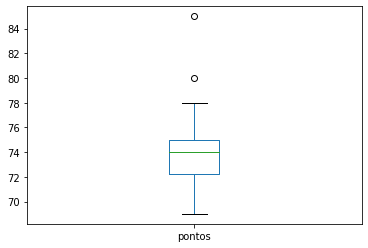

In [33]:
# TERCEIRO PONTO

df['pontos'].plot.box()

In [38]:
# QUARTO PONTO

# SENDO Q1, Q2, Q3 O INTERVALOR INTERQUARTIL É DADO POR: IIQ = Q3 - Q1
def IIQ(q1, q3):
    return q1 - q3

q1, md, q3 = df['pontos'].quantile([0.25, 0.50, 0.75])

iiq = IIQ(q1, q3)

intervalo = q3 + 1.5 * iiq
df[ df['pontos'] > q3 + abs(1.5*iiq)]

,pontos
23,80
25,85
